# Intro to embeddings

# Training word2vec architecture:

Image courtesy of Karol Grzegorczyk

Two models:
- CBOW - neural network predicting word given its context
- Skip-gram - neural network predicting context for given input word

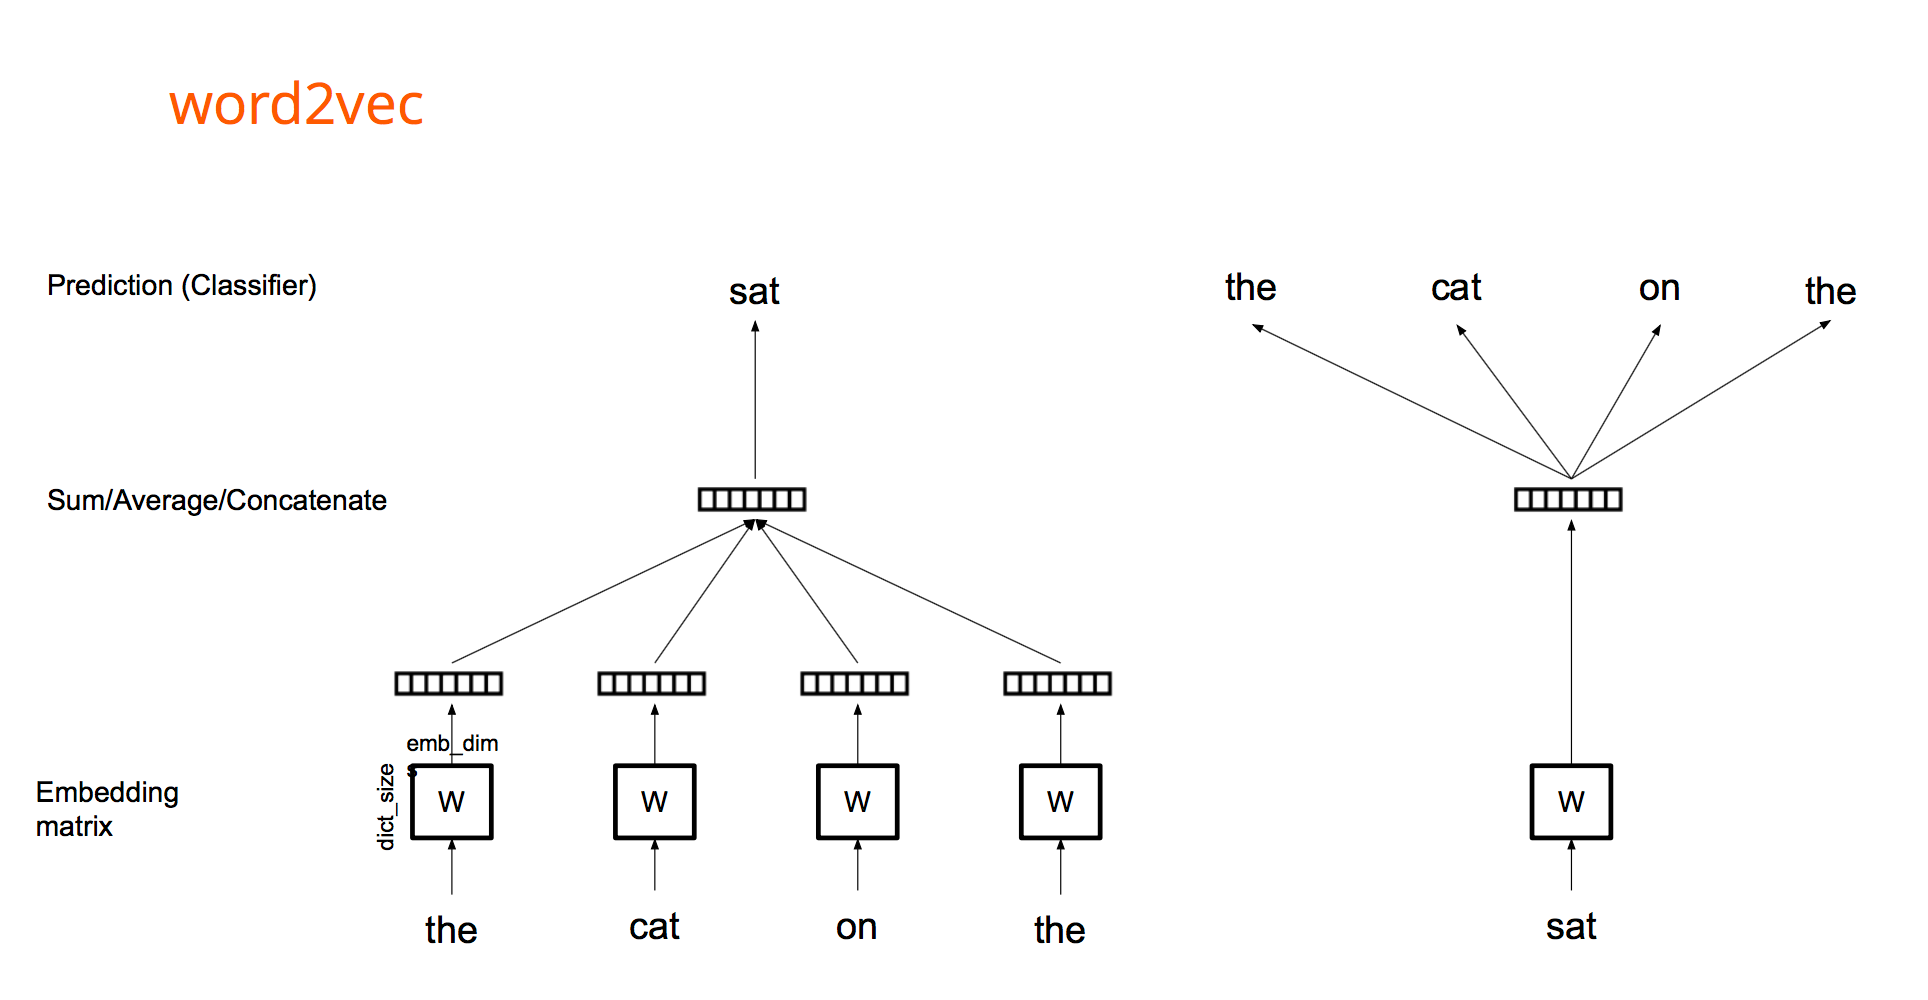

# Vector space:

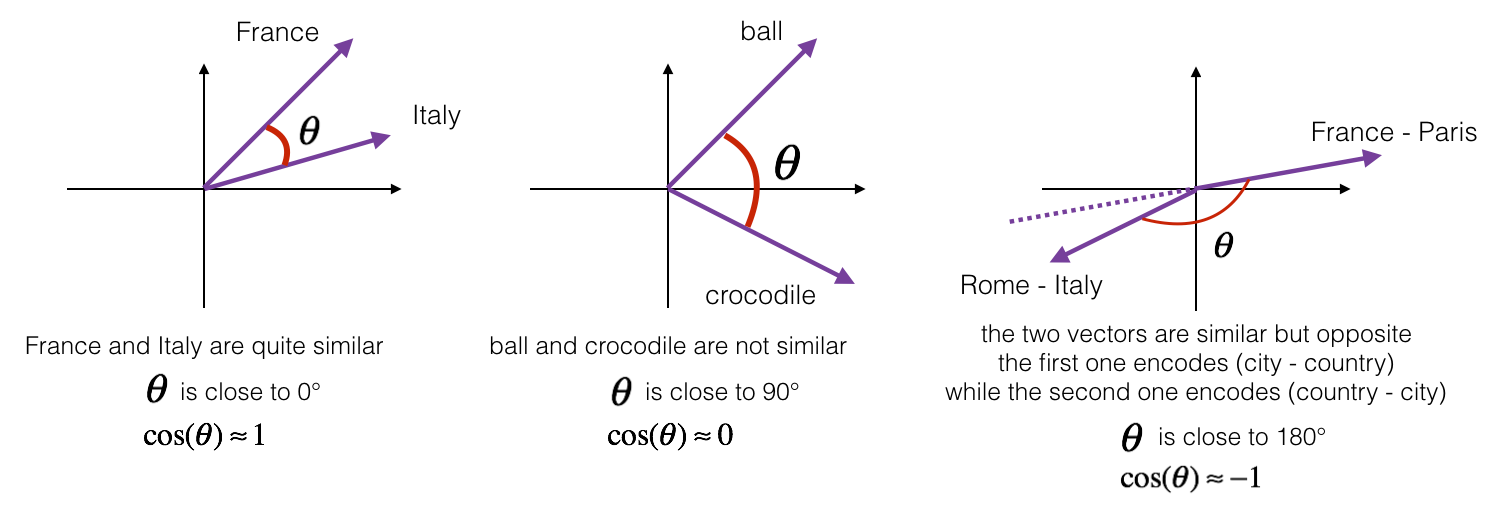

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gensim

Word2vec vectors can be taken from hdfs:

hdfs dfs -get /projects/kraken/html/text/GoogleNews-vectors-negative300.bin.gz

or from google drive:

https://drive.google.com/a/allegrogroup.com/file/d/1Geyruf2PkStw3u2ArZhRgEiUj4s0KYK9/view?usp=sharing

after downloading - please extract it:

gunzip GoogleNews-vectors-negative300.bin.gz

In [2]:
ls

GoogleNews-vectors-negative300.bin  Text-tutorial-part2-Copy1.ipynb
Text-tutorial-part1-Copy1.ipynb     Text-tutorial-part2.ipynb
Text-tutorial-part1.ipynb


In [160]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,
                                                        limit=100000)


## Task 1: implement cosine measure

In [4]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    
    
    return cosine_similarity

### Check some similarities

In [171]:
father = model["father"]
mother = model["mother"]
ball = model["ball"]
crocodile = model["crocodile"]
woman = model["woman"]
man = model["man"]
king = model["king"]
queen = model["queen"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))

cosine_similarity(father, mother) =  0.79014826
cosine_similarity(ball, crocodile) =  0.10283584


Expected output:

    cosine_similarity(father, mother) =  0.79014826
    cosine_similarity(ball, crocodile) =  0.10283584

In [172]:
model.most_similar(positive=['father'])

[('son', 0.8933086395263672),
 ('uncle', 0.8542661666870117),
 ('brother', 0.8240806460380554),
 ('grandfather', 0.8048632144927979),
 ('dad', 0.8040657043457031),
 ('mother', 0.7901483178138733),
 ('nephew', 0.788079023361206),
 ('stepfather', 0.7810977697372437),
 ('eldest_son', 0.7770525217056274),
 ('grandson', 0.7620671987533569)]

## Analogies: "king is for man the same as XXX if for woman"

In [173]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189675331115723),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098592638969421),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531)]

In [174]:
model.most_similar(positive=['girl', 'prince'], negative=['boy'])

[('princess', 0.7421581149101257),
 ('duchess', 0.6354914307594299),
 ('monarch', 0.6182404160499573),
 ('princes', 0.6173640489578247),
 ('queen', 0.6159083247184753),
 ('Camilla', 0.5840418934822083),
 ('royals', 0.5769171118736267),
 ('royal', 0.5742708444595337),
 ('Princess', 0.5723824501037598),
 ('princesses', 0.5464029908180237)]

In [9]:
print("cosine_similarity('a king but not male but female', queen) = ",cosine_similarity(woman + king - man, queen))

cosine_similarity('a king but not male but female', queen) =  0.7300517


In [175]:
model.most_similar(positive=['far', 'slowest'], negative=['slow'])

[('furthest', 0.44649121165275574),
 ('farthest', 0.43936583399772644),
 ('arguably', 0.42630061507225037),
 ('ever', 0.4098908603191376),
 ('fastest', 0.40038973093032837),
 ('strongest', 0.3983948230743408),
 ('smallest', 0.39535874128341675),
 ('weakest', 0.3878867030143738),
 ('than', 0.3834857940673828),
 ('tenth', 0.37209612131118774)]

## Rejections

Imagine you are interested in clouds, but when you explore word embeddings you see that cloud is mostly connected to 'someone else computer', and not to the pretty white thing on the sky...
If we could get the most similar things but ignoring a topic..

This is what rejections are for.

skipping the linear algebra justification...:

In [194]:
def reject(base, to_reject):
    return base - np.dot(np.dot(base,to_reject)/np.dot(to_reject,to_reject), to_reject)

In [195]:
model.most_similar(positive=[model['cloud']])

[('cloud', 0.9999999403953552),
 ('clouds', 0.7632128000259399),
 ('Cloud', 0.6046801805496216),
 ('cloud_computing', 0.5641705989837646),
 ('dark_clouds', 0.542023241519928),
 ('Cloud_computing', 0.5265729427337646),
 ('Clouds', 0.5223087668418884),
 ('pall', 0.5148372054100037),
 ('SaaS', 0.499646931886673),
 ('Amazon_EC2', 0.4842623770236969)]

In [196]:
model.most_similar(positive=[reject(model['cloud'],model['computing'])])

[('cloud', 0.9514703750610352),
 ('clouds', 0.7471941709518433),
 ('Cloud', 0.5406793355941772),
 ('dark_clouds', 0.5364556312561035),
 ('pall', 0.5294489860534668),
 ('Clouds', 0.4997723698616028),
 ('haze', 0.4451564848423004),
 ('mist', 0.43166041374206543),
 ('fog', 0.4246329963207245),
 ('sky', 0.416948527097702)]

# similar case: rock is either a music genre or a solid piece of material found on earth...

In [200]:
# typical - music:
model.most_similar(positive=[model['rock']])

[('rock', 1.0),
 ('rock_n_roll', 0.6322391629219055),
 ('rockers', 0.6205431818962097),
 ('punk_rock', 0.6113223433494568),
 ('rocks', 0.5988795757293701),
 ('indie_rock', 0.5954660177230835),
 ("rock'n'roll", 0.5695278644561768),
 ('punk', 0.5532917380332947),
 ('rocker', 0.5468633770942688),
 ('band', 0.5463343262672424)]

In [201]:
# without 'punk' aspect:
model.most_similar(positive=[reject(model['rock'],model['punk'])],topn=20)

[('rock', 0.8329875469207764),
 ('rocks', 0.577808141708374),
 ('sandstone', 0.45384252071380615),
 ('boulder', 0.45320069789886475),
 ('limestone', 0.44755303859710693),
 ('Rock', 0.4462448060512543),
 ('granite', 0.4285910725593567),
 ('slab', 0.41536810994148254),
 ('bedrock', 0.4136289358139038),
 ('stone', 0.41347169876098633),
 ('boulders', 0.4038049280643463),
 ('slabs', 0.3926430344581604),
 ('pebble', 0.390971839427948),
 ('pebbles', 0.38429659605026245),
 ('sand', 0.3801409602165222),
 ('rock_formations', 0.3737097382545471),
 ('cliff', 0.3654880225658417),
 ('stones', 0.360837459564209),
 ('gravel', 0.3587465286254883),
 ('Rocks', 0.3538697063922882)]

# Use word2vec embedings to find similarities in 20 News Groups Datasets

In [11]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaroslaw.bojar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [203]:
import re
token_pattern = re.compile(r"(?u)\b\w\w+\b")

def tokenize(doc):
    return token_pattern.findall(doc)

def remove_stopwords(sentence):
    return [w for w in sentence if w not in stopwords]

def get_doc_vecs(doc):
    return [model.get_vector(word) for word in doc if word in model.vocab]

def centroid(doc):
    return np.mean(get_doc_vecs(remove_stopwords(tokenize(doc))),axis=0)

In [263]:
def softmax(x):    
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def pred_softmax(doc_centroids, class_centroids):
    for c in doc_centroids:
        similarities = [cosine_similarity(c,category_vector) for category_vector in class_centroids]
        yield np.argmax(softmax(similarities))

In [14]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [15]:
# we will limit to 4 categories here
selected_categories = ['alt.atheism',  'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast']

# Caution! we are using this api to get just a train dataset first
twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=selected_categories, 
                                  remove=('headers', 'footers', 'quotes'),
                                  shuffle=True, 
                                  random_state=42)

In [280]:
class_centroids = []
for i in range(4):
    docs = np.array(twenty_train.data)[np.array(twenty_train.target) == i]
    words = [word for doc in docs for word in doc.split(" ")]
    class_centroids.append(centroid(" ".join(words)))

In [281]:
doc_centroids_train = [centroid(doc) for doc in twenty_train.data]

/home/kraken/.conda/envs/html2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kraken/.conda/envs/html2/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [282]:
preds = list(pred_softmax(doc_centroids_train, class_centroids))

In [283]:
metrics.accuracy_score(twenty_train.target, preds)

0.6925536774783005

In [284]:
metrics.confusion_matrix(twenty_train.target, preds)

array([[364,  55,  41,  20],
       [179, 389,  18,  13],
       [109,   7, 406,  24],
       [150,  11,  46, 357]])

In [285]:
twenty_test = fetch_20newsgroups(subset='test', 
                                 categories=selected_categories, 
                                 remove=('headers', 'footers', 'quotes'),
                                 shuffle=True, 
                                 random_state=42)
doc_centroids_test = [centroid(doc) for doc in twenty_test.data]
y_pred_class = list(pred_softmax(doc_centroids_test,class_centroids))

/home/kraken/.conda/envs/html2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kraken/.conda/envs/html2/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [286]:
metrics.accuracy_score(twenty_test.target, y_pred_class)

0.6561427590940289

## Other ideas of how to use word embeddings for a good model?

# WordMover distance

Centroids as a representation of whole documents loose a lot of information. Therfore document distances based on them are not very reliable.

WordMover distance calculates distance between documents as the minimum amount of distance that the embedded words of one document need to "travel" to reach the embedded words of another document.

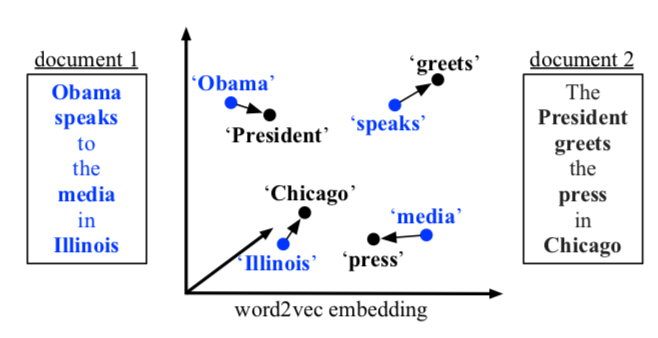

In [16]:
sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_band = 'The band gave a concert in Japan'
sentence_obama2 = 'Obama speaks in Illinois'

In [17]:
sentence_obama_centr = centroid(sentence_obama)
sentence_president_centr = centroid(sentence_president)
sentence_band_centr = centroid(sentence_band)
sentence_obama2_centr = centroid(sentence_obama2)

In [40]:
def doc_array(doc):
    return remove_stopwords(tokenize(doc))

In [28]:
sentence_obama_array = doc_array(sentence_obama)
sentence_president_array = doc_array(sentence_president)
sentence_band_array = doc_array(sentence_band)
sentence_obama2_array = doc_array(sentence_obama2)

In [63]:
def sentence_cent_cos_similarity(s1, s2):
    c1 = centroid(s1)
    c2 = centroid(s2)
    return cosine_similarity(c1, c2)    
    
def sentence_wm_similarity(s1, s2):
    s1_array = doc_array(s1)
    s2_array = doc_array(s2)
    return 1.0/(1.0 + model.wmdistance(s1_array, s2_array))
    
def compare_sim(s1, s2):
    cos_sim = sentence_cent_cos_similarity(s1, s2)
    wm_sim = sentence_wm_similarity(s1, s2)
    print("{} <-> {}\ncos {}, wm {}:\n".format(s1, s2, cos_sim, wm_sim))
    
def print_centroid_cos_similarity(s1, s2):
    sim = sentence_cent_cos_similarity(s1, s2)
    print("{}: {} <-> {}".format(sim, s1, s2))
    
def print_wm_similarity(s1, s2):
    sim = sentence_wm_similarity(s1, s2)
    print("{}: {} <-> {}".format(sim, s1, s2))

In [64]:
compare_sim(sentence_president, sentence_obama)
compare_sim(sentence_president, sentence_band)
compare_sim(sentence_president, sentence_obama2)

The president greets the press in Chicago <-> Obama speaks to the media in Illinois
cos 0.5704523921012878, wm 0.246779086655099:

The president greets the press in Chicago <-> The band gave a concert in Japan
cos 0.3018287718296051, wm 0.24757136337234656:

The president greets the press in Chicago <-> Obama speaks in Illinois
cos 0.5048989653587341, wm 0.23089717128625573:



In [65]:
compare_sim("The terrorists attacked in Paris", "Bomb exploded in France")
compare_sim("The terrorists attacked in Paris", "Fashion week in France")

The terrorists attacked in Paris <-> Bomb exploded in France
cos 0.41394153237342834, wm 0.21876102474368403:

The terrorists attacked in Paris <-> Fashion week in France
cos 0.390562504529953, wm 0.22618340771623302:

